# Test 1: Pure sine with noise

One possible approach to evaluating the frequency detection system's performance in the presence of noise, is to subject it to a set of simulated input signals, where the noise power increses with each iteration. This way, we can present a plot showing e.g. average frequency estimate, and estimate error expressed as a function of Signal-to-Noise Ratio (SNR).

PS. for a pure sine buried with added noise, the Signal-to-Noise Ratio can be calculated with the following formula:<br>
$$SNR = \frac{P_{sin}}{P_{noise}} = \frac{A^2/2}{\sigma_{noise}^2}$$

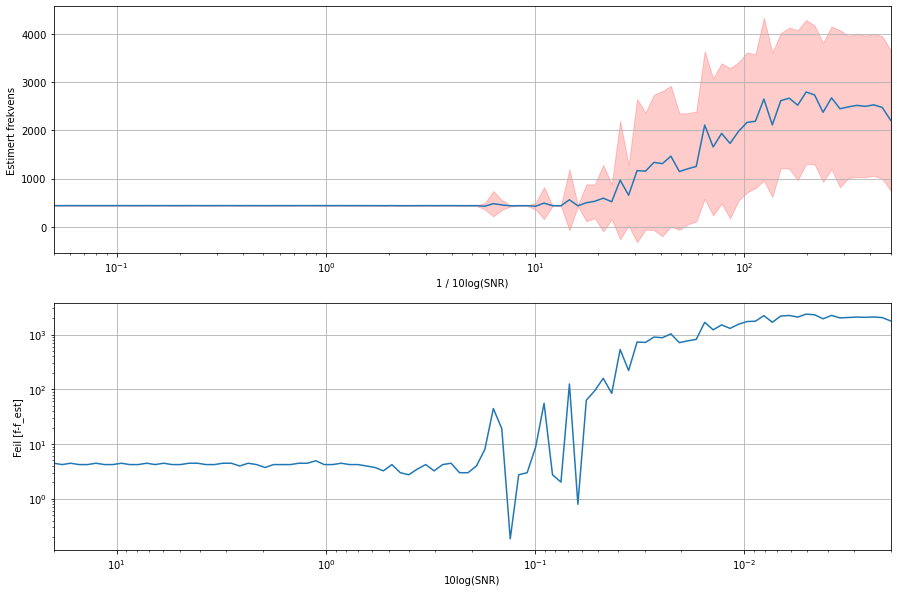

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from baseline_algorithm import freq_detection

# For snr i DFT så har N samples påvirkning, samtidig som vindusfunksjoner og lekasje
# fordi den minker DFT signalkrafta. SNR = SNR + 10log10(N/N') ka e N'?

# Lage ein funksjon som finner variansen til signalet for å finne realistisk SNR, https://support.numxl.com/hc/en-us/articles/360050017731-Calculating-Signal-to-Noise-Ratio-Using-DFT

# 

fs = 10000
duration = 4
N = duration*fs 
f = 435
A = 2

SNR = []
estimatedFreqs = []
errors = []
stdDev = []

t = np.arange(N)/fs

signal = A*np.sin(2*np.pi*f*t)

snrList = np.logspace(-1,3,100)

for noise_variance in snrList:
    noise = np.random.normal(scale=np.sqrt(noise_variance), size=N)
    xn = signal+noise
    SNR.append(A**2/2 / noise_variance)
    timestamps, freqs = freq_detection(xn, fs)
    estimatedFreqs.append(np.mean(freqs))
    stdDev.append(np.std(freqs))
    errors.append(np.abs(f-np.mean(freqs)))

estimatedFreqs = np.array(estimatedFreqs)
stdDev = np.array(stdDev)
SNR = np.array(SNR)
    
fig, ax = plt.subplots(2,1, figsize=(15, 10))

ax[0].plot(1/SNR,estimatedFreqs)
ax[0].set_xlabel('1 / 10log(SNR)')
ax[0].fill_between(1/SNR, estimatedFreqs - stdDev, estimatedFreqs + stdDev, color='r', alpha=0.2)
ax[0].set_ylabel('Estimert frekvens')
ax[0].set_xlim(min(1/SNR), max(1/SNR))
ax[0].set_xscale('log') 
ax[0].grid(True)

ax[1].plot(SNR,errors)
ax[1].set_xlabel('10log(SNR)')
ax[1].set_ylabel('Feil [f-f_est]')
ax[1].set_xlim(max(SNR), min(SNR))
ax[1].set_xscale('log') 
ax[1].set_yscale('log') 
ax[1].grid(True)


    
# WRITE YOUR CODE IN THIS CELL:

[Here](Figures/sineTest_LF.png) is an image showing a *suggestion* for what or test output may look like for a tone of $885 Hz$. As we can see, the frequency detection system produces a stable output in the presence of noise, up to a point where the noise power is $\approx 20$ times greater than the sinusoid power. However, there is always some estimation error due to the limited resolution bandwidth offered by the FFT, resulting in the average error never going below $\approx 3.6 \text{ Hz}$.